## Importing Packages

In [297]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import gdown as gd

## Importing .csv files, forming numeric DataFrames, and setting `np.random` seed

In [298]:
search_times_df = pd.read_csv(gd.download(f"https://drive.google.com/uc?id=1LWvkQNZ08bRUbLX4gwTqzIMNVtDyLJKw", "search-times-dataset.csv", quiet=False))
firing_rates_df = pd.read_csv(gd.download(f"https://drive.google.com/uc?id=1YN5ANX9YWaOIS9t4s4OiFfNHnUpHK_Pb", "firing-rates-dataset.csv", quiet=False))

Downloading...
From: https://drive.google.com/uc?id=1LWvkQNZ08bRUbLX4gwTqzIMNVtDyLJKw
To: /content/search-times-dataset.csv
100%|██████████| 5.98k/5.98k [00:00<00:00, 8.13MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YN5ANX9YWaOIS9t4s4OiFfNHnUpHK_Pb
To: /content/firing-rates-dataset.csv
100%|██████████| 23.5k/23.5k [00:00<00:00, 29.4MB/s]


Create two new DataFrames, named `search_times_numeric_df` and `firing_rates_numeric_df` respectively, containing only the numerical part of the data i.e. excluding the headings, for convenience during calculations.

In [299]:
search_times_numeric_df = search_times_df.iloc[2:].apply(pd.to_numeric, errors='coerce')

In [300]:
firing_rates_numeric_df = firing_rates_df.iloc[2:].apply(pd.to_numeric, errors='coerce')

Select a number to be used as seed for `np.rand` in Question 3 $(a)$ and $(b)$

In [301]:
seed_number = 17 #Could technically be different, but having the same seed in both places is simpler

# Question 1
## Computation of average search delays, relative entropy distance per neutron, and $l_1$ distance per neutron.

## $(a)$ For each image pair in Figure 1, compute the average search delay.

We can use the previously made `search_times_numeric_df` for this question.

\

_(Note: The baseline reaction time can subtracted from the calculated mean, instead of from every value in the DataFrame, keeping the original DataFrame intact.)_

In [302]:
# The following line has been used purely for debugging/verification
search_times_numeric_df.head()

,Set 1,Set 1.1,Set 1.2,Set 1.3,Set 1.4,Set 1.5,Set 2,Set 2.1,Set 2.2,Set 2.3,Set 2.4,Set 2.5,Set 3,Set 3.1,Set 3.2,Set 3.3,Set 3.4,Set 3.5
2,375,5025,771,1319,485,501,607,826,767,602,545,710,1257,655,547,494,499,495
3,1425,1146,1490,1149,554,655,653,1210,546,766,490,548,880,719,655,820,605,497
4,2088,1540,1532,1431,820,932,707,710,545,879,431,435,981,550,658,710,438,495
5,875,1422,994,542,875,1263,600,1260,765,1434,607,655,1046,600,601,988,1100,662
6,1373,1646,1590,1160,490,658,875,715,1651,820,600,710,1536,1211,600,1147,714,825


Compute the means of each row of this DataFrame, and store them in `average_search_delays`.

In [303]:
average_search_delays = search_times_numeric_df.mean().values
# The following line has been used purely for debugging/verification
average_search_delays

array([1211.77777778, 1409.40277778, 1313.25      , 1337.13888889,
        603.26388889,  624.66666667,  831.31944444,  830.79166667,
        641.40277778,  635.52777778,  546.55555556,  579.95833333,
       1146.33333333,  943.23611111,  637.40277778,  669.93055556,
        567.84722222,  537.38888889])

Now, subtract the baseline reaction time, _328 ms_, from each element in `average_search_delays`, and print it.

In [304]:
# ----------Do not run this cell multiple times----------
average_search_delays -= 328
average_search_delays
# ----------Do not run this cell multiple times----------

array([ 883.77777778, 1081.40277778,  985.25      , 1009.13888889,
        275.26388889,  296.66666667,  503.31944444,  502.79166667,
        313.40277778,  307.52777778,  218.55555556,  251.95833333,
        818.33333333,  615.23611111,  309.40277778,  341.93055556,
        239.84722222,  209.38888889])

## $(b)$ Compute the relative entropy distance per neutron.

We can use the previously created `firing_rates_numeric_df` for this problem.

In [305]:
# The following line has been used purely for debugging/verification
firing_rates_numeric_df.head()

,Set 1,Set 1.1,Set 1.2,Set 1.3,Set 1.4,Set 1.5,Set 2,Set 2.1,Set 2.2,Set 2.3,Set 2.4,Set 2.5,Set 3,Set 3.1,Set 3.2,Set 3.3,Set 3.4,Set 3.5
2,24.000000,21.230769,44.615385,38.666667,25.538462,38.000000,10.0,21.333333,5.333333,28.666667,4.333333,29.000000,26.333333,46.666667,20.666667,50.769231,21.666667,40.333333
3,25.538462,11.692308,30.769231,19.000000,16.615385,23.666667,29.0,35.333333,15.333333,37.333333,17.666667,37.333333,33.666667,29.333333,16.000000,20.000000,17.333333,19.333333
4,2.333333,5.000000,5.666667,5.000000,11.666667,13.333333,17.0,14.333333,14.333333,19.000000,11.333333,16.000000,20.666667,17.333333,14.333333,16.666667,10.333333,13.666667
5,41.666667,53.000000,43.333333,39.000000,43.000000,48.333333,15.0,17.666667,16.000000,15.000000,13.666667,15.000000,28.333333,16.333333,15.333333,26.666667,21.333333,25.333333
6,18.000000,21.666667,27.333333,17.666667,16.000000,23.333333,13.0,11.333333,10.666667,20.333333,14.000000,15.666667,30.000000,27.333333,20.000000,28.333333,21.666667,34.000000


Create a new DataFrame, `entropy_df`, of the same dimensions as `firing_rates_numeric_df`.

In [306]:
entropy_df = pd.DataFrame(index=firing_rates_numeric_df.index, columns=firing_rates_numeric_df.columns)

On `firing_rates_numeric_df`, we now apply the formula

$$S = \lambda_n\ln\left(\frac{\lambda_n}{\mu_n}\right)-\lambda_n+\mu_n$$

Here, $\lambda$ represents the oddball image, and $\mu$ represents the distracter image, with $n$ varying along the columns. The columns are paired as their respective L, R pairs _(say (A,a), (B,b), and so on)_, and the values obtained by applying the formula for $S$ on these columns are stored in their equivalent columns in `entropy_df`.

\

_i.e._ For example, for some elements $\lambda$ and $\mu$ at the $n^{th}$ row in the first and second columns, respectively, $S_{\lambda,\mu}$ and $S_{\mu,\lambda}$ are situated in positions in `entropy_df` equivalent to the positions of $\lambda$ and $\mu$ in `firing_rates_numeric_df`.

_Note: Some entries in the original .csv file are listed as zero, which the logarithm cannot accept. To work around this, in the twelfth and thirteenth lines, we check for, and replace, these zeroes with a very small number $eta$, say $10^{-10}$._

_But, in the event we wish to exclude the rows containg datapoints equalling zero, we replace the respective datapoint pairs with NaN, which will then be ignored in the computation for $S$, and of `relative_entropy_distances`. Use line 8 to change to the preferred condition. Note that we only remove the pairs involved, and not the entire row, as that disturbs the data collected from other, possibly independent, experiments._

In [307]:
eta = 1e-10

# Iterate over column pairs, say (A,a), (B,b), ...
for col1, col2 in zip(firing_rates_numeric_df.columns[::2], firing_rates_numeric_df.columns[1::2]):
    x1, y1 = firing_rates_numeric_df[col1], firing_rates_numeric_df[col2]  # x = col1, y = col2
    x2, y2 = firing_rates_numeric_df[col2], firing_rates_numeric_df[col1]  # Swap for next column

    include_datapoint_zero = False  # Set to True to use the "Including datapoints that contain zero" section

    if include_datapoint_zero:
        # Replace zeroes with eta
        x1_safe, y1_safe = np.where(x1 > 0, x1, eta), np.where(y1 > 0, y1, eta)
        x2_safe, y2_safe = np.where(x2 > 0, x2, eta), np.where(y2 > 0, y2, eta)


    else:
        # Replace zeros with NaN only in the specific pairs
        x1_safe = np.where((x1 == 0) | (y1 == 0), np.nan, x1)
        y1_safe = np.where((x1 == 0) | (y1 == 0), np.nan, y1)

        x2_safe = np.where((x2 == 0) | (y2 == 0), np.nan, x2)
        y2_safe = np.where((x2 == 0) | (y2 == 0), np.nan, y2)


    # Compute "S"
    S1 = x1_safe * np.log(x1_safe / y1_safe) - x1 + y1
    S2 = x2_safe * np.log(x2_safe / y2_safe) - x2 + y2

    # Store the results in the corresponding columns
    entropy_df[col1] = S1
    entropy_df[col2] = S2

# The following line has been used purely for debugging/verification
entropy_df.head()

,Set 1,Set 1.1,Set 1.2,Set 1.3,Set 1.4,Set 1.5,Set 2,Set 2.1,Set 2.2,Set 2.3,Set 2.4,Set 2.5,Set 3,Set 3.1,Set 3.2,Set 3.3,Set 3.4,Set 3.5
2,0.173225,0.166289,0.435781,0.415485,2.312540,2.639682,3.756476,4.830628,14.363954,24.877079,16.429179,30.461137,5.265543,6.369080,11.528018,15.527215,5.202929,6.396599
3,6.105883,4.711486,3.063883,2.609783,1.173780,1.320530,0.604935,0.646094,8.355519,11.221346,6.448344,8.266393,0.305385,0.291678,0.429703,0.462871,0.107212,0.111186
4,0.888340,1.144034,0.042591,0.040851,0.108800,0.113752,0.233967,0.221034,0.626800,0.688505,0.758474,0.850781,0.301740,0.284562,0.171539,0.180381,0.444290,0.487660
5,1.308731,1.417961,0.232289,0.224273,0.305716,0.317865,0.212225,0.224120,0.032616,0.031922,0.061098,0.063023,3.606877,3.003094,2.848093,3.423606,0.333861,0.353540
6,0.329409,0.350403,2.262347,1.956450,1.296626,1.470199,0.116948,0.111721,2.785195,3.451139,0.091975,0.095488,0.126046,0.122195,1.367199,1.535356,2.570647,2.986575


We can now find the averages for each of these columns, thereby ending up with the effective formula $$D = \frac{1}{N}\overset{N}{\underset{n=1}{\sum}}\left[\lambda(n)\ln\left(\frac{\lambda}{\mu}\right)-\lambda+\mu\right].$$

These averages represent the _relative entropy distance per neuron_ and can now be stored in `relative_entropy_distances`.

In [308]:
relative_entropy_distances = entropy_df.mean().values
relative_entropy_distances

array([0.63834794, 0.61835705, 0.65685051, 0.66293651, 1.55337325,
       1.63076479, 1.11677337, 1.09011194, 1.46193832, 1.56548597,
       1.77473095, 2.12783769, 0.65428099, 0.78416525, 1.13060613,
       1.47729041, 1.64344117, 1.72498623])

## $(c)$ Compute the $l_1$ distance per neutron.

We can use the previously created `firing_rates_numeric_df` for this problem.

In [309]:
# The following line has been used purely for debugging/verification
firing_rates_numeric_df.head()

,Set 1,Set 1.1,Set 1.2,Set 1.3,Set 1.4,Set 1.5,Set 2,Set 2.1,Set 2.2,Set 2.3,Set 2.4,Set 2.5,Set 3,Set 3.1,Set 3.2,Set 3.3,Set 3.4,Set 3.5
2,24.000000,21.230769,44.615385,38.666667,25.538462,38.000000,10.0,21.333333,5.333333,28.666667,4.333333,29.000000,26.333333,46.666667,20.666667,50.769231,21.666667,40.333333
3,25.538462,11.692308,30.769231,19.000000,16.615385,23.666667,29.0,35.333333,15.333333,37.333333,17.666667,37.333333,33.666667,29.333333,16.000000,20.000000,17.333333,19.333333
4,2.333333,5.000000,5.666667,5.000000,11.666667,13.333333,17.0,14.333333,14.333333,19.000000,11.333333,16.000000,20.666667,17.333333,14.333333,16.666667,10.333333,13.666667
5,41.666667,53.000000,43.333333,39.000000,43.000000,48.333333,15.0,17.666667,16.000000,15.000000,13.666667,15.000000,28.333333,16.333333,15.333333,26.666667,21.333333,25.333333
6,18.000000,21.666667,27.333333,17.666667,16.000000,23.333333,13.0,11.333333,10.666667,20.333333,14.000000,15.666667,30.000000,27.333333,20.000000,28.333333,21.666667,34.000000


Create a new Dataframe, `l_1_df`, of the same dimensions as `firing_rates_numeric_df`.

In [310]:
l_1_df = pd.DataFrame(index=firing_rates_numeric_df.index, columns=firing_rates_numeric_df.columns)

In a way similar to the previous question, pair up columns, and apply the formula $$S = |\lambda - \mu|$$ on `firing_rates_numeric_df`.
Store these values in their respective columns in `l_1_df`

In [311]:
for col1, col2 in zip(firing_rates_numeric_df.columns[::2], firing_rates_numeric_df.columns[1::2]):
    x, y = firing_rates_numeric_df[col1], firing_rates_numeric_df[col2]  # x = col1, y = col2

    # Compute absolute difference |x - y|
    abs_diff = np.abs(x - y)

    # Store results in l_1_df (same values for both paired columns)
    l_1_df[col1] = abs_diff
    l_1_df[col2] = abs_diff

# The following line has been used purely for debugging/verification
l_1_df.head()

,Set 1,Set 1.1,Set 1.2,Set 1.3,Set 1.4,Set 1.5,Set 2,Set 2.1,Set 2.2,Set 2.3,Set 2.4,Set 2.5,Set 3,Set 3.1,Set 3.2,Set 3.3,Set 3.4,Set 3.5
2,2.769231,2.769231,5.948718,5.948718,12.461538,12.461538,11.333333,11.333333,23.333333,23.333333,24.666667,24.666667,20.333333,20.333333,30.102564,30.102564,18.666667,18.666667
3,13.846154,13.846154,11.769231,11.769231,7.051282,7.051282,6.333333,6.333333,22.000000,22.000000,19.666667,19.666667,4.333333,4.333333,4.000000,4.000000,2.000000,2.000000
4,2.666667,2.666667,0.666667,0.666667,1.666667,1.666667,2.666667,2.666667,4.666667,4.666667,4.666667,4.666667,3.333333,3.333333,2.333333,2.333333,3.333333,3.333333
5,11.333333,11.333333,4.333333,4.333333,5.333333,5.333333,2.666667,2.666667,1.000000,1.000000,1.333333,1.333333,12.000000,12.000000,11.333333,11.333333,4.000000,4.000000
6,3.666667,3.666667,9.666667,9.666667,7.333333,7.333333,1.666667,1.666667,9.666667,9.666667,1.666667,1.666667,2.666667,2.666667,8.333333,8.333333,12.333333,12.333333


Now, compute the mean for each column, hereby ending up with the effective formula $$ L = \frac{1}{N}\overset{N}{\underset{n=1}{\sum}}\left|\lambda-\mu\right|.$$ These values represent the _$l_1$ distance per neuron_ and can be stored in `L_1_distances`.

In [312]:
L_1_distances = l_1_df.mean().values
L_1_distances

array([2.7756785 , 2.7756785 , 3.20633068, 3.20633068, 4.79391394,
       4.79391394, 3.79158273, 3.79158273, 4.13455124, 4.13455124,
       4.72969894, 4.72969894, 3.11108657, 3.11108657, 3.94509803,
       3.94509803, 5.45929509, 5.45929509])

# Question 2
## Fitting a straight line passing through the origin

Here, we follow the _Method of Least Squares_ to find the best straight line that fits the data.

Since the required lines must pass through the origin, they follow the form $y=mx$, where the formula for the optimal slope $m$ is given by: $$m = \frac{\sum(x_iy_i)}{\sum(x_i^2)}.$$

## $(a)$ Relative entropy on $x$-axis, and __inverse__ of search delays on $y$-axis

Create the inverse of `average_search_delays`, named `inverse_avg_search_delays`.

In [313]:
inverse_avg_search_delays = 1/average_search_delays
# The following line has been used purely for debugging/verification
inverse_avg_search_delays

array([0.00113151, 0.00092472, 0.00101497, 0.00099094, 0.00363288,
       0.00337079, 0.00198681, 0.0019889 , 0.00319078, 0.00325174,
       0.0045755 , 0.00396891, 0.001222  , 0.00162539, 0.00323203,
       0.00292457, 0.00416932, 0.0047758 ])

We assign $x$ and $y$ coordinates from their respective arrays as `x_entropy` and `y_inverse_search`.

In [314]:
x_entropy = relative_entropy_distances
y_inverse_search = inverse_avg_search_delays

We now compute and print the best fit slope through the origin using the aforementioned formula, and find the fitted values of $y$ for their respective values of $x$ in `x_entropy`.

In [315]:
slope_entropy = np.sum(x_entropy * y_inverse_search) / np.sum(x_entropy**2)
fitted_y_entropy = slope_entropy * x_entropy
slope_entropy

0.002201685956532322

Optional: We can plot these "points" and the computed line that best fits these "points", to have a graphical understanding of the situation.

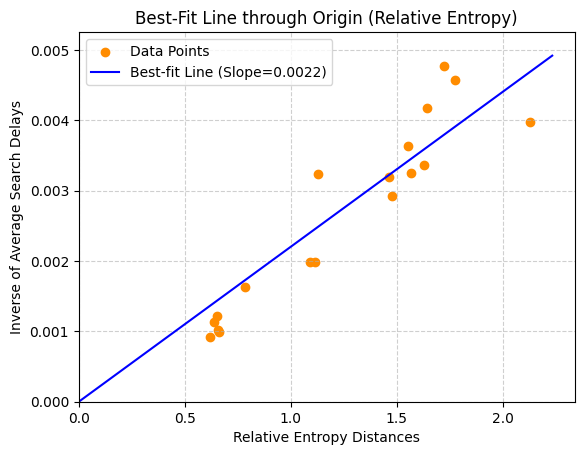

In [316]:
# To ensure the line plotted passes through the origin
x_fit_entropy = np.linspace(0, max(x_entropy)*1.05, 100)
y_fit_entropy = slope_entropy * x_fit_entropy

# Plot the data points
plt.scatter(x_entropy, y_inverse_search, color='darkorange', label='Data Points')

# Plot the best-fit line
plt.plot(x_fit_entropy, y_fit_entropy, color='blue', label=f'Best-fit Line (Slope={slope_entropy:.4f})')

# Ensure origin is visible
plt.xlim(0, max(x_entropy) * 1.1)
plt.ylim(0, max(y_inverse_search) * 1.1)

# Labels and title
plt.xlabel("Relative Entropy Distances")
plt.ylabel("Inverse of Average Search Delays")
plt.title("Best-Fit Line through Origin (Relative Entropy)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.show()

## $(b)$ $l_1$ distances on the $x$-axis, and __inverse__ of search delays on the $y$-axis

We can use the previously created `inverse_avg_search_delays` for this subquestion as well.

In [317]:
# The following line has been used purely for debugging/verification
inverse_avg_search_delays

array([0.00113151, 0.00092472, 0.00101497, 0.00099094, 0.00363288,
       0.00337079, 0.00198681, 0.0019889 , 0.00319078, 0.00325174,
       0.0045755 , 0.00396891, 0.001222  , 0.00162539, 0.00323203,
       0.00292457, 0.00416932, 0.0047758 ])

We assign $x$ and $y$ coordinates from their respective arrays as `x_l1` and `y_inverse_search`, the latter of which we already obtained in the previous subquestion.

In [318]:
x_l1 = L_1_distances

We now compute the best fit slope through the origin using the aforementioned formula, and find the fitted values of $y$ for their respective values of $x$ in `x_l1`.

In [319]:
slope_l1 = np.sum(x_l1 * y_inverse_search) / np.sum(x_l1**2)
fitted_y_l1 = slope_l1 * x_l1
slope_l1

0.0007000776902229356

Optional: We can plot these "points", and the computed line that best fits these "points", to have a graphical visualization of the situation.

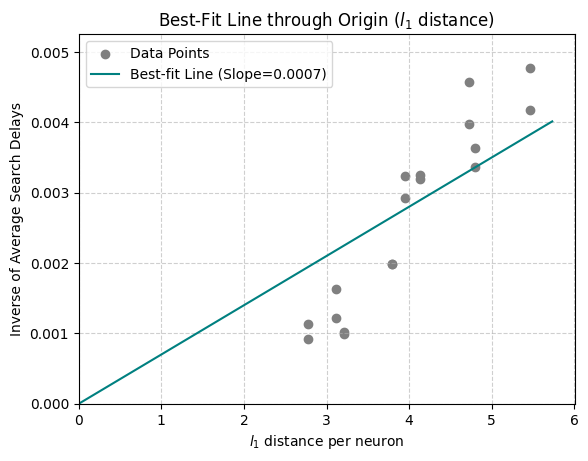

In [320]:
# To ensure the line plotted passes through the origin
x_fit_l1 = np.linspace(0, max(x_l1)*1.05, 100)
y_fit_l1 = slope_l1 * x_fit_l1

# Plot the data points
plt.scatter(x_l1, y_inverse_search, color='grey', label='Data Points')

# Plot the best-fit line
plt.plot(x_fit_l1, y_fit_l1, color='teal', label=f'Best-fit Line (Slope={slope_l1:.4f})')

# Ensure origin is visible
plt.xlim(0, max(x_l1) * 1.1)
plt.ylim(0, max(y_inverse_search) * 1.1)

# Labels and title
plt.xlabel("$l_1$ distance per neuron")
plt.ylabel("Inverse of Average Search Delays")
plt.title("Best-Fit Line through Origin ($l_1$ distance)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show the plot
plt.show()

## Which is the better fit?

To check which of the above lines was a better fit, we can compare the _SSR_ (Sum of Squared Resuduals, or Residual Sum of Squares) values of the two fits. The fit with the lower SSR value is deemed the _"better fit"_.

The SSR values can be computed by adding the squares of the difference between `fitted_y` and `y_inverse_search` at each point. This is the reason a `fitted_y` was formed independently from `y_fit`, which is a superset of, but not the same as, `fitted_y`.

In [321]:
SSR_entropy = np.sum((y_inverse_search - fitted_y_entropy) ** 2)
SSR_l1 = np.sum((y_inverse_search - fitted_y_l1) ** 2)

We can now simply compare them using "$<$", and print a conclusive statement.

In [322]:
if SSR_entropy < SSR_l1:
    print("The line computed using Relative Entropy Distances is the better fit.")
else:
    print("The line computed using $l_1$ Distances per Neuron is the better fit.")

The line computed using Relative Entropy Distances is the better fit.


# Question 3
## Fitting a Gamma distribution to the search delays

## $(a)$ Select half the columns from search times dataset, and estimate shape parameter.

We first select half the number of columns from `search_times_numeric_df`, and store them in `selected_search_times_numeric_df`, followed by subtracting _328 ms_ from each entry in `selected_search_times_numeric_df`.

We also store the unselected columns in `unselected_columns` for future use.

In [323]:
np.random.seed(seed_number)  # Ensures consistent selection every time the code runs. Could be any number.
selected_columns = np.random.choice(search_times_numeric_df.columns, size=9, replace=False)
unselected_columns = [col for col in search_times_numeric_df.columns if col not in selected_columns] # Will be used in future cells

selected_search_times_numeric_df = search_times_numeric_df[selected_columns].copy()
selected_search_times_numeric_df -= 328

# The following line has been used purely for debugging/verification
selected_search_times_numeric_df.head(10)

,Set 3.1,Set 1.3,Set 1.2,Set 3,Set 1.5,Set 2.5,Set 1.1,Set 2.2,Set 2.4
2,327,991,443,929,173,382,4697,439,217
3,391,821,1162,552,327,220,818,218,162
4,222,1103,1204,653,604,107,1212,217,103
5,272,214,666,718,935,327,1094,437,279
6,883,832,1262,1208,330,382,1318,1323,272
7,1042,2854,1589,1162,828,665,1538,884,327
8,378,323,833,657,162,273,657,107,162
9,552,709,818,552,162,107,932,52,217
10,877,655,1107,657,217,53,819,437,104
11,822,381,503,767,328,217,328,163,162


We then compute the means and standard deviations for each column, and store them in `means` and `std_devs`, respectively.

In [324]:
means = selected_search_times_numeric_df.mean().values
std_devs = selected_search_times_numeric_df.std().values

# The following lines have been used purely for debugging/verification
print(means)
print(std_devs)

[ 615.23611111 1009.13888889  985.25        818.33333333  296.66666667
  251.95833333 1081.40277778  313.40277778  218.55555556]
[314.98417099 667.30053844 558.70813641 452.61163902 190.14405214
 128.21059233 744.13842154 312.69130076 142.38728074]


Now, form the plot _Standard Deviation_ vs _Mean_. $x$-axis contains the values of the means of selected columns, while the $y$-axis consists of the standard deviations of the selected columns.

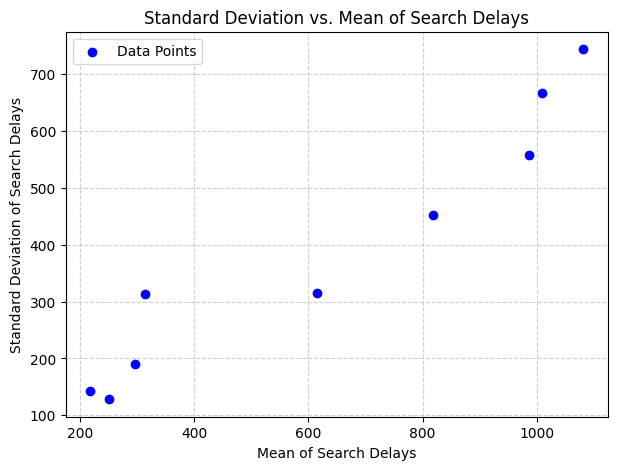

In [325]:
plt.figure(figsize=(7, 5))
plt.scatter(means, std_devs, color='blue', label='Data Points')
plt.xlabel("Mean of Search Delays")
plt.ylabel("Standard Deviation of Search Delays")
plt.title("Standard Deviation vs. Mean of Search Delays")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Using $\mu = a/b$ and $\sigma = \sqrt{a}/b$ we can find the shape parameter $a$ as $$a = \frac{\mu^2}{\sigma^2}.$$
Compute the value of $a$ for every column selected, and store it in `shape_parameters`. For the final estimate, we can calculate the mean of all values of $a$.

In [326]:
shape_parameters = (means ** 2) / (std_devs ** 2)
estimated_shape = shape_parameters.mean()

# Print estimated shape parameter
print(f"Estimated Shape Parameter (a): {estimated_shape:.6f}")

Estimated Shape Parameter (a): 2.694386


## $(b)$ Select half the samples from unselected columns, and estimate rate parameter.

We can use the previously-created `unselected-columns` here, and create a DataFrame named `unselected_search_times_numeric_df`.

In [327]:
unselected_search_times_numeric_df = search_times_numeric_df[unselected_columns].copy()

We form `unselectedd_reset`, by resetting the indexing of `unselected_search_times_numeric_df`. Then, we form the DataFrame `sampled_unselected_df`, with the same dimensions as that of `unselected_reset`. Since this is a new DataFrame, all entries are set by default to `NaN`.

Also, we create another new DataFrame, named `search_delays_df`, with the same number of columns, but exactly half the number of rows in `unselected_reset`. Although not explicitly mentioned in _this_ subquestion, this DataFrame will be used to store unselected samples, for future use.

In [328]:
unselected_reset = unselected_search_times_numeric_df.reset_index(drop=True)

num_rows = unselected_search_times_numeric_df.shape[0]
half_num_rows = num_rows // 2

sampled_unselected_df = pd.DataFrame(index=unselected_reset.index, columns=unselected_reset.columns)

search_delays_df = pd.DataFrame(index=range(half_num_rows), columns=unselected_reset.columns)

# The following line has been used purely for debugging/verification
sampled_unselected_df.head()

,Set 1,Set 1.4,Set 2,Set 2.1,Set 2.3,Set 3.2,Set 3.3,Set 3.4,Set 3.5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We then randomly select half the samples in each of the columns in `unselected_reset`, storing their indices in `sampled_indices`, and only fill in those datapoints in `sampled_unselected`, before subtracting the _baseline reaction time_ from the entries.

We temporarily store the indices of the unselected samples from each column in `leftover_indices`, and use them to fill in `search_delays_df`.

\

_Note: We created `unselected_reset`, and used it to create and later edit `sampled_unselected`, to deal with any possible problem that might crop up due to indexing. This way, we can ensure that the original DataFrame, `unselected_search_times_numeric_df`, does not get disturbed, in the event we may need it again in the future._

In [329]:
np.random.seed(seed_number) # Ensures consistent selection every time the code runs. Could be any number.
for col in sampled_unselected_df.columns:
    sampled_indices = np.random.choice(num_rows, size=num_rows // 2, replace=False)  # Select random row indices for the current column
    leftover_indices = np.setdiff1d(np.arange(num_rows), sampled_indices)

    sampled_unselected_df.loc[sampled_indices, col] = unselected_reset.loc[sampled_indices, col]  # Assign values
    sampled_unselected_df.loc[sampled_indices, col] -= 328  # Subtract 328

    search_delays_df[col] = unselected_reset.loc[leftover_indices, col].values # Leftover (unused) samples

# The following line has been used purely for debugging/verification
sampled_unselected_df.head()

,Set 1,Set 1.4,Set 2,Set 2.1,Set 2.3,Set 3.2,Set 3.3,Set 3.4,Set 3.5
0,47,157,279,NaN,274,NaN,166,171,167
1,NaN,NaN,NaN,NaN,NaN,327,492,NaN,NaN
2,NaN,NaN,NaN,382,NaN,330,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1106,273,NaN,NaN,334
4,1045,NaN,547,NaN,492,272,819,NaN,497


From the updated `sampled_unselected_df`, we can find the means and standard deviations of the columns, as `.mean` and `.std` can be configured to skip `NaN`. Store these in `sample_means` and `sample_std_devs`, respectively.

In [330]:
sample_means = sampled_unselected_df.mean(skipna=True)
sample_std_devs = sampled_unselected_df.std(skipna=True)

# The following lines have been used purely for debugging/verification
print(sample_means)
print(sample_std_devs)

Set 1          823.25
Set 1.4    279.222222
Set 2      561.333333
Set 2.1    537.138889
Set 2.3    303.527778
Set 3.2    328.972222
Set 3.3    341.805556
Set 3.4    207.861111
Set 3.5    197.222222
dtype: object
Set 1       528.95311
Set 1.4     200.67744
Set 2       478.55246
Set 2.1    379.667309
Set 2.3    222.191486
Set 3.2    215.647793
Set 3.3     294.81421
Set 3.4    148.684931
Set 3.5    111.099726
dtype: object


Using $\mu = a/b$ and $\sigma = \sqrt{a}/b$ we can find the shape parameter $b$ as $$b = \frac{\mu}{\sigma^2}.$$
We can now use `sample_means` and `sample_std_devs` to calculate `b_values` for each pair, from which we can then estimate the value of $b$.

In [331]:
b_values = sample_means / (sample_std_devs ** 2)
rate_parameter_estimate = b_values.mean()

# Print estimated rate parameter
print(f"Estimated Rate Parameter (b): {rate_parameter_estimate:.6f}")

Estimated Rate Parameter (b): 0.006510


## $(c)$ Plotting cdf's and computing _Kolmogrov-Smirnov test statistic_

We first take the previously-created `search_delays_df`, which holds the unused datapoints, and flatten it to a unidimensional NumPy array, named `search_delays`. This makes it easier to compute the empirical CDF.

In [332]:
search_delays = search_delays_df.values.flatten()
search_delays_df.head()

,Set 1,Set 1.4,Set 2,Set 2.1,Set 2.3,Set 3.2,Set 3.3,Set 3.4,Set 3.5
0,1425,554,653,826,766,547,710,605,497
1,2088,820,707,1210,879,1150,988,438,495
2,875,875,600,1260,545,710,600,1100,715
3,2036,490,656,715,765,542,711,714,547
4,875,381,1468,656,545,545,1211,1160,770


We sort the `search_delays` array and compute the empirical CDF using the formula $F(x_i) = \frac{\text{rank}(x_i)}{N},$ where $x_i$ is a sorted value.

In [333]:
search_delays_sorted = np.sort(search_delays)
# The following line has been used purely for debugging/verification
print(search_delays_sorted[:15])

N = len(search_delays_sorted) # Total number of entries in the array, expected = (18/2)*(72/2)
# The following line has been used purely for debugging/verification
print(N)

F_x = np.arange(1, N + 1) / N  # Empirical CDF values
# The following line has been used purely for debugging/verification
print(F_x[:5])

[380 380 380 380 381 382 385 385 385 385 386 386 386 386 390]
324
[0.00308642 0.00617284 0.00925926 0.01234568 0.0154321 ]


We use the previously extimated shape and rate parameters to compute the theoretical Gamma CDF using SciPy's `gamma.cdf()` function.

In [334]:
G_x = st.gamma.cdf(search_delays_sorted, estimated_shape, scale=1/rate_parameter_estimate)  # Using estimated a, b

# The following line has been used purely for debugging/verification
print(G_x[:5])

[0.52696157 0.52696157 0.52696157 0.52696157 0.528615  ]


Plotting the CDFs: The empirical CDF and the theoretical Gamma CDF are plotted together for comparison.

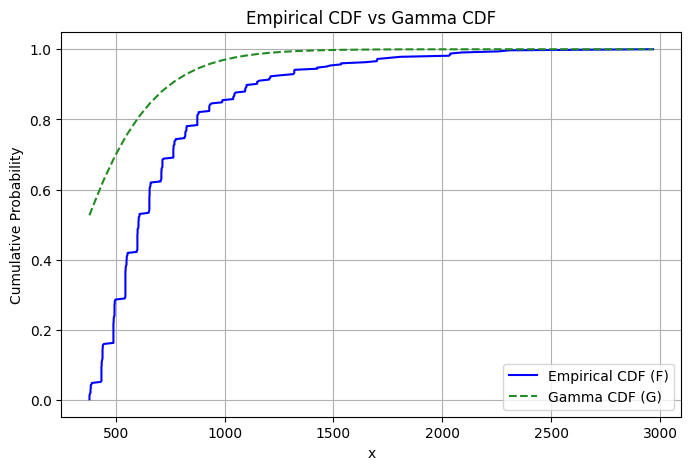

In [345]:
plt.figure(figsize=(8, 5))
plt.plot(search_delays_sorted, F_x, label='Empirical CDF (F)', linestyle='-', color='blue')
plt.plot(search_delays_sorted, G_x, label='Gamma CDF (G)', linestyle='--', color='forestgreen')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('Empirical CDF vs Gamma CDF')
plt.legend()
plt.grid()
plt.show()

The _Kolmogorov-Smirnov test statistic_: It is the maximum absolute difference between the empirical CDF $F(x)$ and the theoretical Gamma CDF $G(x)$, given by $$\mathsf{KS}(F,G) = \underset{x}{\mathsf{max}} | F(x) - G(x) |.$$

In [336]:
KS_statistic = np.max(np.abs(F_x - G_x))

print(f"Kolmogorov-Smirnov test statistic: {KS_statistic:.6f}")

Kolmogorov-Smirnov test statistic: 0.557032
